In [1]:
import pandas as pd
import numpy as np

In [2]:
#Import file
customers = pd.read_csv("marketing_customer_analysis.csv")

In [3]:
#Show the dataframe shape
customers.shape

(9134, 24)

In [4]:
#Standardize header names
cols = []
for column in customers.columns:
    cols.append(column.lower())
customers.columns = cols

customers.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
#Which columns are numerical?
customers._get_numeric_data()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [6]:
#Which columns are categorical?
customers.select_dtypes('object')

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [7]:
#Check and deal with NaN values
#customers.isna().sum()
round(customers.isna().sum()/len(customers),4)*100  # shows the percentage of null values in a column

customer                         0.0
state                            0.0
customer lifetime value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective to date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location code                    0.0
marital status                   0.0
monthly premium auto             0.0
months since last claim          0.0
months since policy inception    0.0
number of open complaints        0.0
number of policies               0.0
policy type                      0.0
policy                           0.0
renew offer type                 0.0
sales channel                    0.0
total claim amount               0.0
vehicle class                    0.0
vehicle size                     0.0
dtype: float64

In [8]:
#customers = customers.drop(['vehicle type'], axis=1)  # drop a single column
customers.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
#customers[customers['response'].isna()==True].head(60)

# Replacing null values for categorical variables
customers['response'].unique()
customers['response'].value_counts()

customers['response'].value_counts(dropna=False)


No     7826
Yes    1308
Name: response, dtype: int64

In [10]:
# use most common value to fillna
customers['response'] = customers['response'].fillna('No')
len(customers[customers['gender'].isna()==True]) # now this number is 0

0

In [11]:
#Datetime format - Extract the months from the dataset and store in a separate column. 

print (customers['effective to date'].dtype)

customers['effective to date'] = pd.to_datetime(customers['effective to date'])

print (customers['effective to date'].dtype)


object
datetime64[ns]


In [12]:
customers['month'] = customers['effective to date'].dt.month
customers.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [13]:
#Then filter the data to show only the information for the first quarter , ie. January, February and March. 
#Hint: If data from March does not exist, consider only January and February.

Q1 = customers[(customers['month']<=3)]
Q1

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [14]:
#***********BEGINNING OF ROUND 3******************

In [15]:
#Show DataFrame info

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

In [16]:
#Describe DataFrame
customers.describe()


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


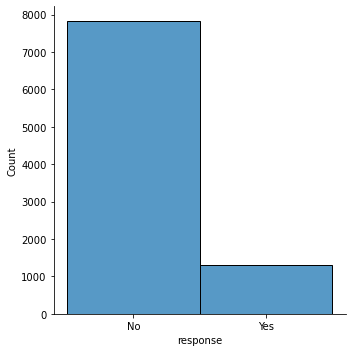

In [17]:
#Show a plot of the total number of responses
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(customers['response'], bins=20)

plt.show()

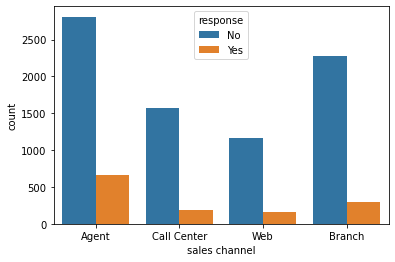

In [18]:
#Show a plot of the response rate by the sales channel

sns.countplot(x='sales channel', hue='response', data = customers)
plt.show()


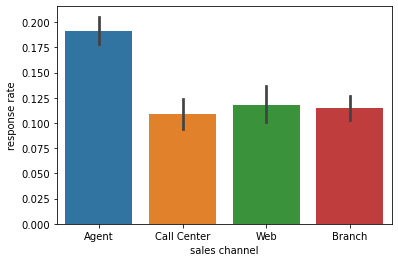

In [19]:
# Create new column with response rate
def resp_rate(x):
    if x == "No":
        return 0
    else:
        return 1

customers['response rate'] = list(map(resp_rate,customers['response']))   
customers.head()

sns.barplot(x='sales channel', y = 'response rate', data = customers)
plt.show()

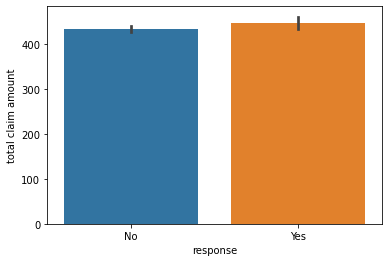

In [20]:
#Show a plot of the response rate by the total claim amount
sns.barplot(x= "response", y= "total claim amount", data = customers)
plt.show()


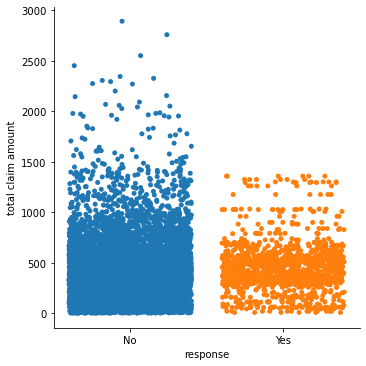

In [21]:
sns.catplot(x= "response",y="total claim amount", data=customers, jitter="0.4")
plt.show()

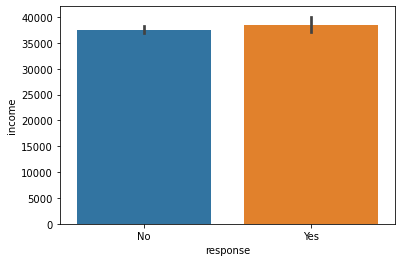

In [22]:
#Show a plot of the response rate by income

sns.barplot(x="response", y="income", data = customers)
plt.show()

In [23]:
#***********BEGINNING OF ROUND 4******************

In [24]:
#1Check the data types of the columns. 
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

In [25]:
#1.1Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.
numerical = customers._get_numeric_data()
numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate
0,2763.519279,56274,69,32,5,0,1,384.811147,2,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,2,0
3,7645.861827,0,106,18,65,0,7,529.881344,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,2,0
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,2,0
9130,3096.511217,21604,79,14,28,0,1,379.200000,2,1
9131,8163.890428,0,85,9,37,3,2,790.784983,2,0
9132,7524.442436,21941,96,34,3,0,3,691.200000,2,0


In [26]:
categoricals = customers.select_dtypes('object')
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [27]:
#2Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables

import matplotlib.pyplot as plt
import seaborn as sns



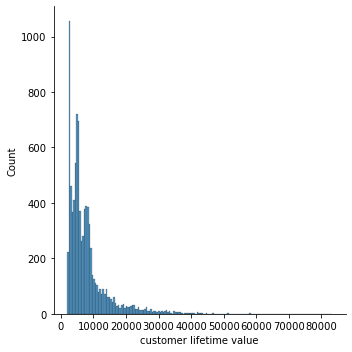

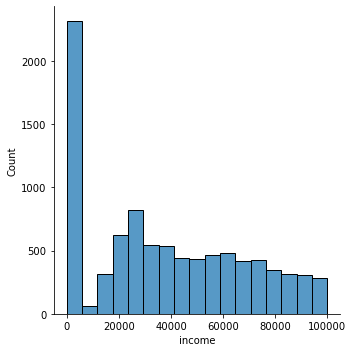

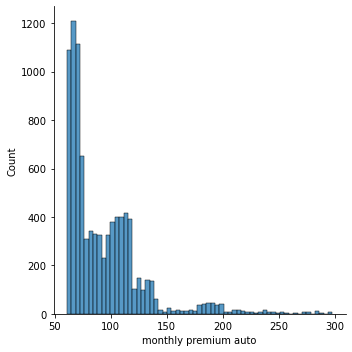

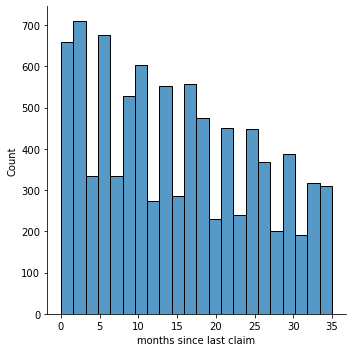

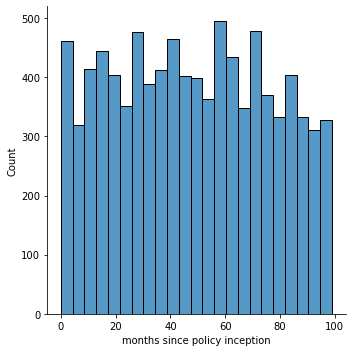

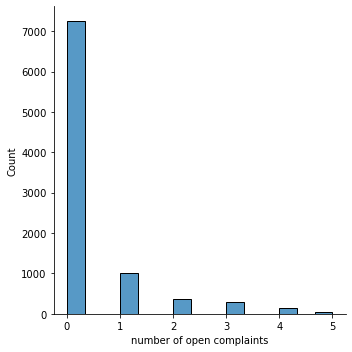

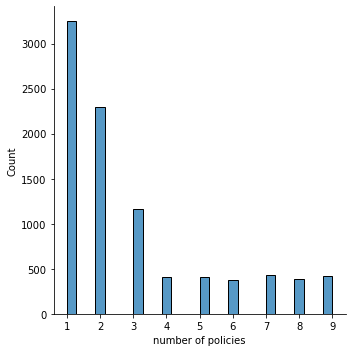

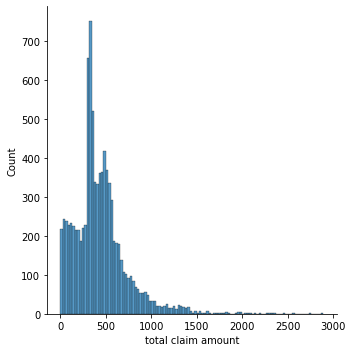

In [28]:
sns.displot (numerical['customer lifetime value'])
plt.show()

sns.displot (numerical['income'])
plt.show()

sns.displot (numerical['monthly premium auto'])
plt.show()

sns.displot (numerical['months since last claim'])
plt.show()

sns.displot (numerical['months since policy inception'])
plt.show()

sns.displot (numerical['number of open complaints'])
plt.show()

sns.displot (numerical['number of policies'])
plt.show()

sns.displot (numerical['total claim amount'])
plt.show()


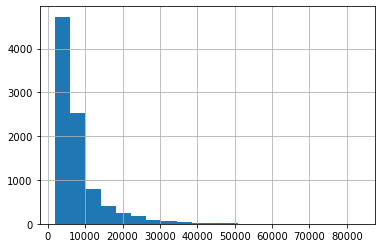

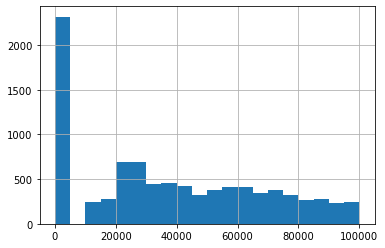

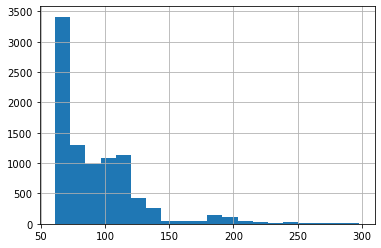

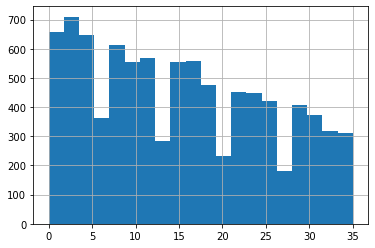

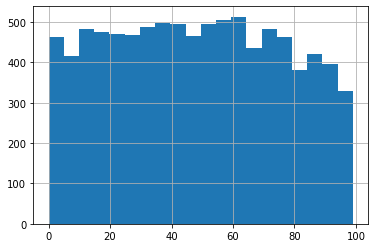

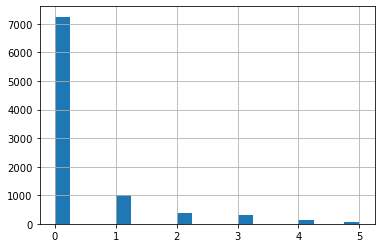

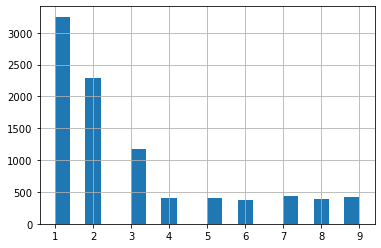

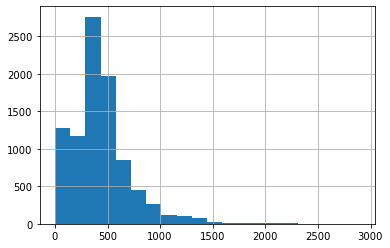

In [29]:
#Use Matplotlib to construct histograms

numerical['customer lifetime value'].hist(bins=20)
plt.show()

numerical['income'].hist(bins=20)
plt.show()

numerical['monthly premium auto'].hist(bins=20)
plt.show()

numerical['months since last claim'].hist(bins=20)
plt.show()

numerical['months since policy inception'].hist(bins=20)
plt.show()

numerical['number of open complaints'].hist(bins=20)
plt.show()

numerical['number of policies'].hist(bins=20)
plt.show()

numerical['total claim amount'].hist(bins=20)
plt.show()


In [30]:
#Do the distributions for different numerical variables look like a normal distribution

#No, these don't.  The closest graph to a normal distribution is 'total claim amount', but this one is also skewed to the right.

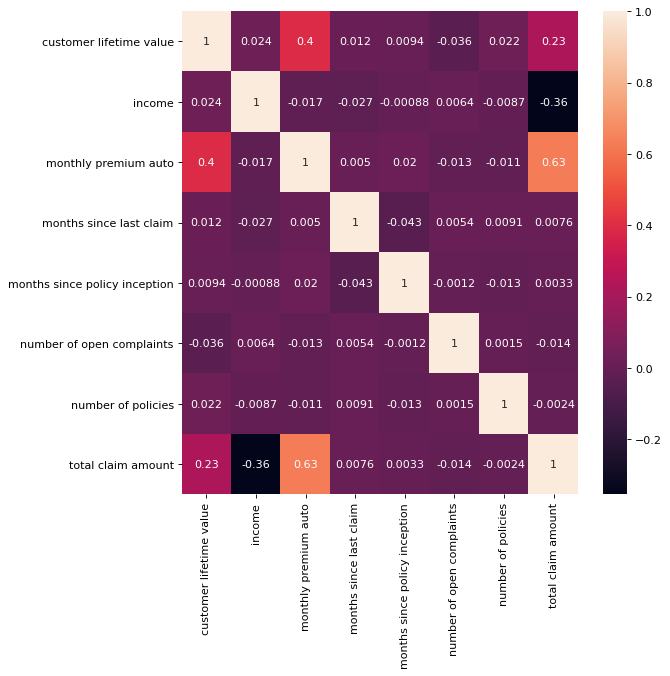

In [31]:
#3For the numerical variables, check the multicollinearity between the features. 

#How do you change the size of figure drawn with Matplotlib?
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

reduced_numerical = numerical.drop(['response rate','month'],axis=1)
correlations_matrix = reduced_numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [32]:
#4Drop one of the two features that show a high correlation between them (greater than 0.9). 

##There are no features noted with this high correlation

In [33]:
#4.1Write code for both the correlation matrix and for seaborn heatmap. 
##See above

#If there is no pair of features that have a high correlation, then do not drop any features

##There are no features noted with this high correlation - nothing dropped


In [34]:
#***********BEGINNING OF ROUND 5******************

In [35]:
# Processing Data: X-y split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

y = numerical['total claim amount']
X = numerical.drop(['response rate','total claim amount','month'],axis=1)


In [36]:
# Processing Data: Normalize (numerical)

transformer = MinMaxScaler().fit(X)
X_normalized = transformer.transform(X)
X2 = pd.DataFrame(X_normalized, columns=X.columns)


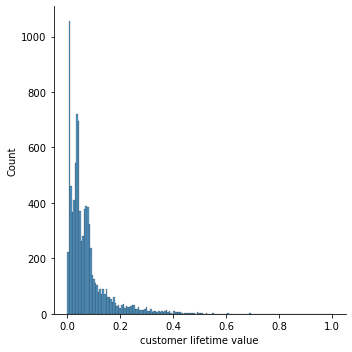

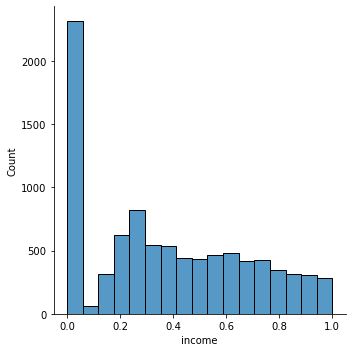

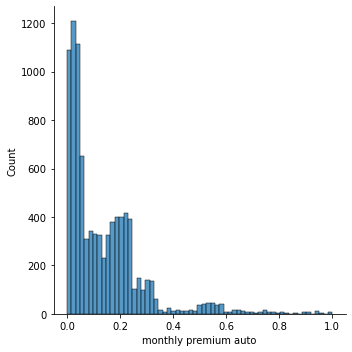

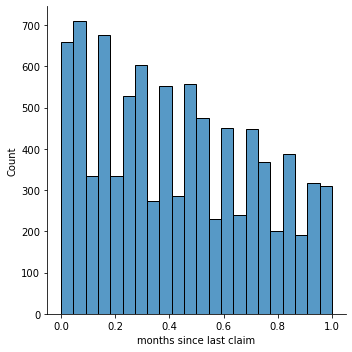

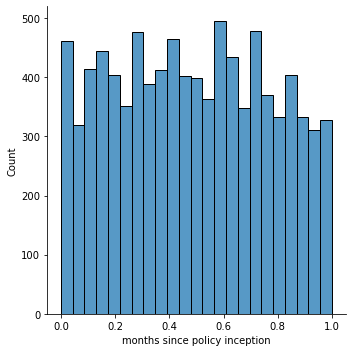

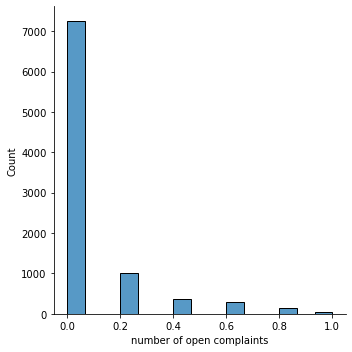

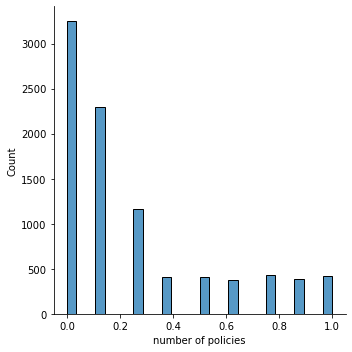

In [37]:
sns.displot (X2['customer lifetime value'])
plt.show()

sns.displot (X2['income'])
plt.show()

sns.displot (X2['monthly premium auto'])
plt.show()

sns.displot (X2['months since last claim'])
plt.show()

sns.displot (X2['months since policy inception'])
plt.show()

sns.displot (X2['number of open complaints'])
plt.show()

sns.displot (X2['number of policies'])
plt.show()


In [38]:
#***********BEGINNING OF ROUND 6******************

In [39]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [40]:
#Drop customer from categoricals - I don't consider useful for further analysis

cat_clean= categoricals.drop(['customer'],axis=1)
cat_clean.head()

,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [41]:
counts = cat_clean.nunique()
counts

state               5
response            2
coverage            3
education           5
employmentstatus    5
gender              2
location code       3
marital status      3
policy type         3
policy              9
renew offer type    4
sales channel       4
vehicle class       6
vehicle size        3
dtype: int64

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(cat_clean)
categoricals_array = encoder.transform(cat_clean).toarray()
#onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
#onehot_encoded.head()

In [43]:
final_columns = list()
to_drop_columns = list()      
         
for columns in encoder.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            to_drop_columns.append(column)
            final_columns.append(column)
            condition = False
        else:
            final_columns.append(column)    

In [44]:
categoricals_df = pd.DataFrame(data = categoricals_array, columns = final_columns)
categoricals_df

,Arizona,California,Nevada,Oregon,Washington,No,Yes,Basic,Extended,Premium,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
#Processing Data: Concat DataFrames
X = pd.concat([X2, categoricals_df], axis = 1)
X.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,Arizona,California,Nevada,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
#Linear Regression: Train-test split.

# train test split is the way ML generates its claim to fame: we build the model on a portion of the data but we then validate it in another "fresh" portion
# our model has no opportunity to "cheat": it must accurately guess the values in the "fresh" dataset that it never saw before
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
#Linear Regression: Apply linear regression.
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [48]:
#Model Validation
#Training data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

predictions = lm.predict(X_train)
R2 = r2_score(y_train, predictions)
MSE = mean_squared_error(y_train, predictions)
RMSE = np.sqrt(mean_squared_error(y_train, predictions)) #root_mean_square_error
MAE = mean_absolute_error(y_train, predictions)

print(R2)
print(MSE)
print(RMSE)
print(MAE)

0.7743047598267583
19308.59899001347
138.95538489030739
95.20344310729438


In [49]:
#Model Validation
#Test data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

predictions = lm.predict(X_test)
R2 = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions)) #root_mean_square_error
MAE = mean_absolute_error(y_test, predictions)

print(R2)
print(MSE)
print(RMSE)
print(MAE)


0.7626602133403249
18871.13345309513
137.3722441146505
94.52926409906951


In [50]:
#***********BEGINNING OF ROUND 7******************

In [51]:
#Modeling = Try to improve the linear regression model

##Change X to only include higher correlated variables from heat map →'customer lifetime value', 'income' and 'monthly premium auto'

X3 = X2.drop(['months since last claim','months since policy inception','number of open complaints','number of policies'],axis=1)


In [52]:
X3.head()

,customer lifetime value,income,monthly premium auto
0,0.010629,0.562847,0.033755
1,0.062406,0.000000,0.139241
2,0.134960,0.487763,0.198312
3,0.070589,0.000000,0.189873
4,0.011245,0.438443,0.050633


In [53]:
#Processing Data: Concat DataFrames
X = pd.concat([X3, categoricals_df], axis = 1)
X.head()

,customer lifetime value,income,monthly premium auto,Arizona,California,Nevada,Oregon,Washington,No,Yes,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0.010629,0.562847,0.033755,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.062406,0.000000,0.139241,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
#Linear Regression: Train-test split.

# train test split is the way ML generates its claim to fame: we build the model on a portion of the data but we then validate it in another "fresh" portion
# our model has no opportunity to "cheat": it must accurately guess the values in the "fresh" dataset that it never saw before
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#Linear Regression: Apply linear regression.
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [56]:
#Model2 Validation
#Training data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

predictions = lm.predict(X_train)
R2 = r2_score(y_train, predictions)
MSE = mean_squared_error(y_train, predictions)
RMSE = np.sqrt(mean_squared_error(y_train, predictions)) #root_mean_square_error
MAE = mean_absolute_error(y_train, predictions)

print(R2)
print(MSE)
print(RMSE)
print(MAE)

0.7741417724314208
19322.542829744354
139.005549636496
95.09210102052826


In [57]:
#Model2 Validation
#Test data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

predictions = lm.predict(X_test)
R2 = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions)) #root_mean_square_error
MAE = mean_absolute_error(y_test, predictions)

print(R2)
print(MSE)
print(RMSE)
print(MAE)

0.7626929780818277
18868.528294397733
137.3627616728702
94.43043361302682


In [58]:
#Conclusion: Model is slightly improved on the R2 score (0.76266 vs. 0.76269) when comparing the model validation based on the test data.